## Reference
> Vivek Srinivasan's EDA & Ensemble Model (Top 10 Percentile)
> https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile

In [93]:
"""
Bike Sharing Demand 진행방향
1) 훈련, 테스트 데이터셋의 형태 및 컬럼의 속성 데이터 값 파악
2) 데이터 전처리 및 시각화
3) 회귀모델 적용
4) 결론 도출

함수 사용시 꿀팁

함수를 적용 시 내부 파라미터들을 모를 때 Anaconda Prompt or Windows PowerShell을 활용하여 내부의 REPL python 명령창에서
ex)) pandas.to_numeric() 함수의 내부 parameter를 알고 싶다면
help(pandas.to_numeric)하게 되면, 함수의 사용법 등 문서를 열람할 수 있음
=> 제가 굉장히 많이 씁니다!!

"""

'\nBike Sharing Demand 진행방향\n1) 훈련, 테스트 데이터셋의 형태 및 컬럼의 속성 데이터 값 파악\n2) 데이터 전처리 및 시각화\n3) 회귀모델 적용\n4) 결론 도출\n\n함수 사용시 꿀팁\n\n함수를 적용 시 내부 파라미터들을 모를 때 Anaconda Prompt or Windows PowerShell을 활용하여 내부의 REPL python 명령창에서\nex)) pandas.to_numeric() 함수의 내부 parameter를 알고 싶다면\nhelp(pandas.to_numeric)하게 되면, 함수의 사용법 등 문서를 열람할 수 있음\n=> 제가 굉장히 많이 씁니다!!\n\n'

In [94]:
"""필요 라이브러리들 호출"""

import warnings
warnings.filterwarnings('ignore')
help(warnings.filterwarnings)
#jd ignore를 통해 파이썬에서 불필요한 경고문구를 없애줌

import numpy as np 
import pandas as pd 
import seaborn as sns #시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import calendar 
from datetime import datetime

import os
print(os.listdir("../input"))

Help on function filterwarnings in module warnings:

filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)
    Insert an entry into the list of warnings filters (at the front).

    'action' -- one of "error", "ignore", "always", "default", "module",
                or "once"
    'message' -- a regex that the warning message must match
    'category' -- a class that the warning must be a subclass of
    'module' -- a regex that the module name must match
    'lineno' -- an integer line number, 0 matches all warnings
    'append' -- if true, append to the list of filters

['sampleSubmission.csv', 'test.csv', 'train.csv']


In [95]:
import os

os.listdir("../")
#jd ..의 역할: 파일이 위치한 폴더의 상위폴더로 간 뒤, 현존하는 파일들 보여주기



['.DS_Store', 'input', 'code', '.git']

In [96]:
"""
1) 훈련, 테스트 데이터셋의 개괄적인 형태 및 데이터의 컬럼의 속성 및 값의 개수 파악
"""

#훈련데이터와 테스트 데이터 세트를 불러온다
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [97]:
#훈련데이터 셋의 개괄적인 모형 파악
train.head()
#jd train데이터의 head = 컬럼의 제목들을 보여줌. 대략적인 데이터가 어떻게 되있는지 나열.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [98]:
#데이터 셋 내에 있는 컬럼 속성들에 대한 설명

"""
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
"""

#훈련 데이터셋의 각 컬럼별 데이터타입 및 값의 갯수 파악
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [99]:
#테스트 데이터 셋의 개괄적인 형태 출력
test.head()
"""jd. count, casual, registered 는 예측해야할 값들이기에?
casual - number of non-registered user rentals initiated
registered - number of registered user rentals initiated
count - number of total rentals
"""

'jd. count, casual, registered 는 예측해야할 값들이기에?\ncasual - number of non-registered user rentals initiated\nregistered - number of registered user rentals initiated\ncount - number of total rentals\n'

In [100]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [101]:
""" 2) 데이터 전처리 및 시각화 """

#datetime속성을 분리하여 추출속성으로 활용하기 위해 split함수를 사용하여 년-월-일 과 시간을 분리한다.
train['tempDate'] = train.datetime.apply(lambda x:x.split())
#jd []는 배열
#jd lambda는 함수의 이름을 따로 정의할 필요 없이 간단하게 함수의 논리를 표현할 수 있게 해줌

In [102]:
#분리한 tempDate를 가지고 년-월-일을 이용하여 year,month,day 그리고 weekday column을 추출한다.
# split() 내장함수 설명: https://wikidocs.net/13 [문자형 자료형_ 문자열 나누기] <=> join() [문자형 자료형_ 문자열 삽입]
train['year'] = train.tempDate.apply(lambda x:x[0].split('-')[0])
train['month'] = train.tempDate.apply(lambda x:x[0].split('-')[1])
train['day'] = train.tempDate.apply(lambda x:x[0].split('-')[2])
#jd split하여 year 라는 컬럼에 넣기
#weekday는 calendar패키지와 datetime패키지를 활용한다.
#calendar.day_name 사용법 : https://stackoverflow.com/questions/36341484/get-day-name-from-weekday-int
#datetime.strptime 문서: https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
#파이썬에서 날짜와 시간 다루기: https://datascienceschool.net/view-notebook/465066ac92ef4da3b0aba32f76d9750a/ 
train['weekday'] = train.tempDate.apply(lambda x:calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])

train['hour'] = train.tempDate.apply(lambda x:x[1].split(':')[0])

In [103]:
#분리를 통해 추출된 속성은 문자열 속성을 가지고 있음 따라서 숫자형 데이터로 변환해 줄 필요가 있음.
#pandas.to_numeric(): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html
train['year'] = pd.to_numeric(train.year,errors='coerce')
train['month'] = pd.to_numeric(train.month,errors='coerce')
train['day'] = pd.to_numeric(train.day,errors='coerce')
train['hour'] = pd.to_numeric(train.hour,errors='coerce')

In [104]:
#year,month,day,hour가 숫자형으로 변환되었음을 알 수 있음.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  tempDate    10886 non-null  object 
 13  year        10886 non-null  int64  
 14  month       10886 non-null  int64  
 15  day         10886 non-null  int64  
 16  weekday     10886 non-null  object 
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(12), object(3)
memory usage: 1.5+ MB


In [105]:
#필요를 다한 tempDate column을 drop함
train = train.drop('tempDate',axis=1)

In [106]:
train.year

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: year, Length: 10886, dtype: int64

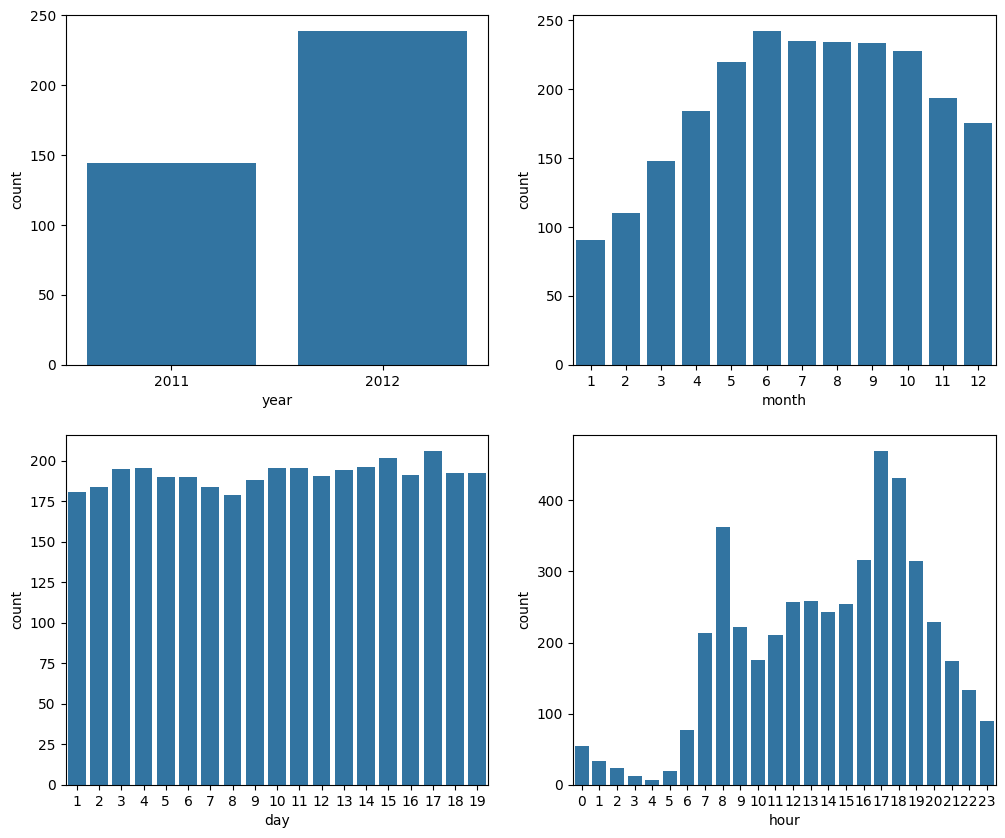

In [107]:
#각각의 속성과 예측의 결과값으로 쓰이는 count값과의 관계 파악

#년도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())
#jd 2,2 two by two로 만듦. 좌 > 우 방향.
#jd seaborn = sns, 시각화 라이브러리
#jd year열을 기준으로 데이터 그룹화 > count 열의 값 대상 후속계산 수행.
#jd mean : count열의 평균값 계산

#month와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())

In [108]:
# jd (2,2,1) : 해가 갈수록 수요가 증가 
# (2,2,2) : 5~10월에 수요 증가 -> 3월부터 봄 / 10월까지 가을
# (2,2,3) : 날짜는 크게 무의미
# (2,2,4) : 시간대는 8시와 오후 6시 -> 출퇴근 시간 이용이 증가 / 그리고 그 사이부분 수요 증가

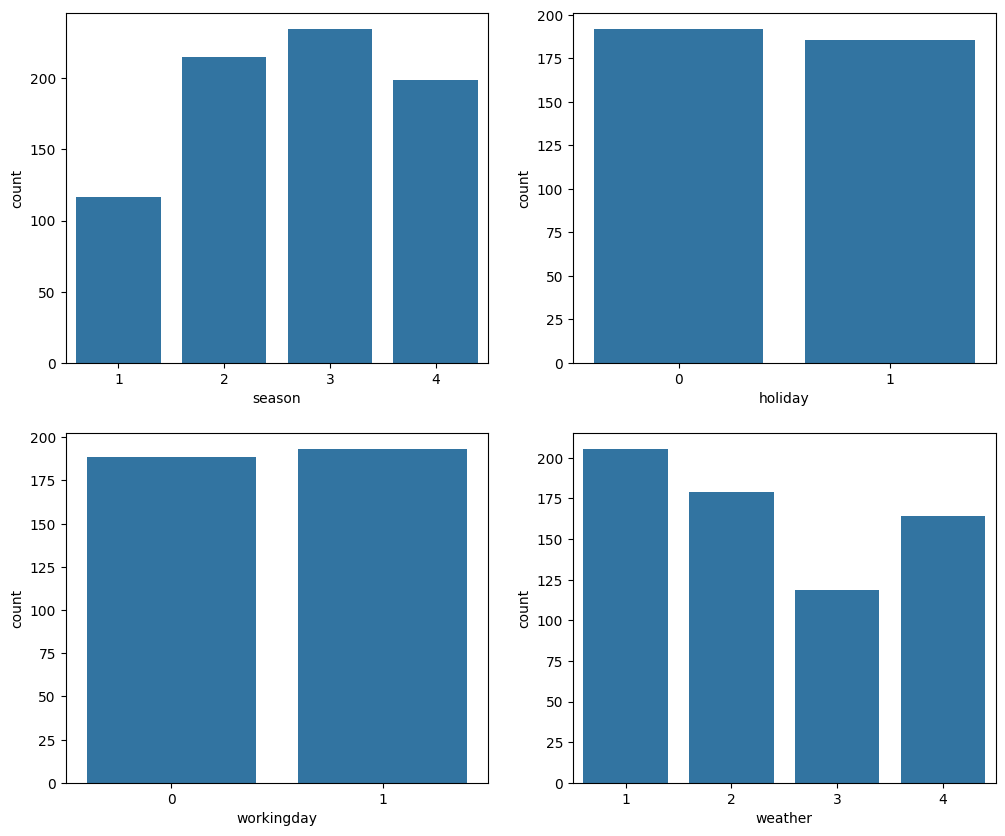

In [109]:
#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [110]:
aaaa = [1, 2, 3, 4, [1, 2]]
[1, 2] in aaaa

# b = [[1, 2],
#     [3, 4]]


True

In [111]:
"""
해당 부분은 필자가 스스로 데이터를 보고 이상함을 느껴 전처리함.
왜냐하면, 처음 import한 데이터 셋에서 head()를 하였을 때 1월1일의 season column은 1 즉 봄을 가르키는데,
직접 3월에 washington을 직접 가본 결과 1월은 확실히 겨울이다.
따라서 아래의 badToRight를 이용하여 season column을 수정하고자 했음.
이 데이터 때문에 참조했던 커널과는 다른 정확도를 나타낼 수 있음.
"""

def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3

#apply() 내장함수는 split(),map(),join(),filter()등 과 함꼐 필수적으로 숙지해야 할 함수이다.
train['season'] = train.month.apply(badToRight)
#jd apply() 함수: Pandas 데이터프레임에서 특정 열에 대해 함수를 적용


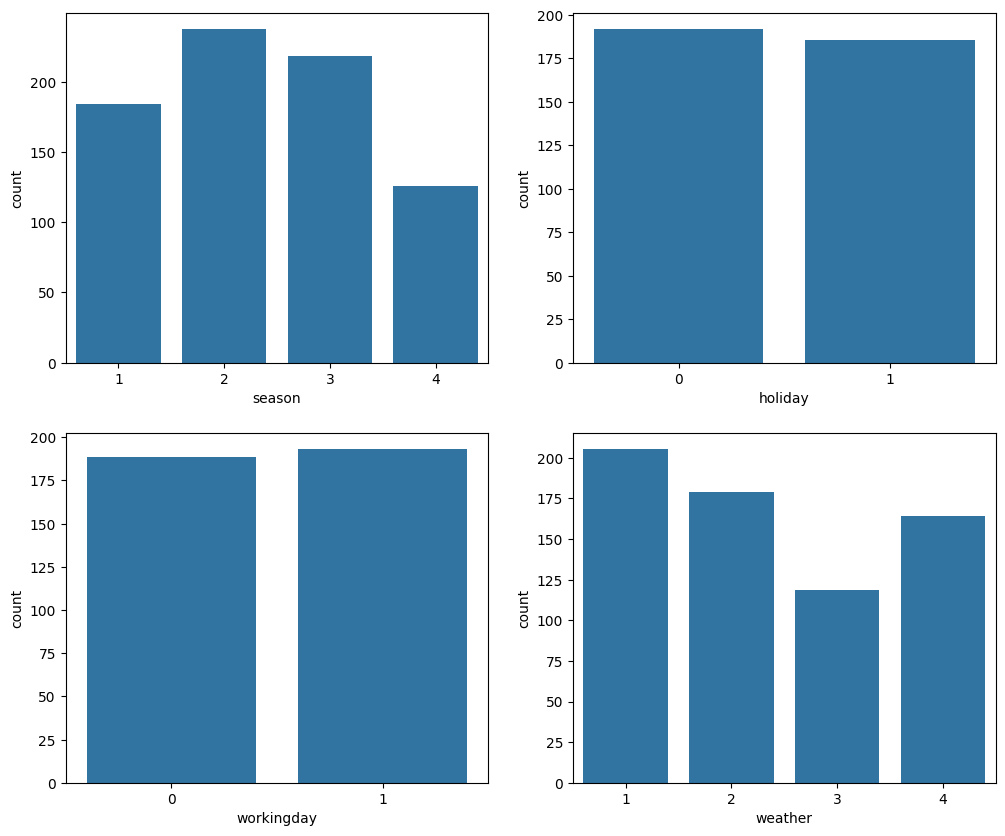

In [112]:
#위의 시각화와 같이 하나의 컬럼과 결과 값을 비교해보자

#계절과 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#휴일 여부와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='holiday',y='count',data=train.groupby('holiday')['count'].mean().reset_index())

#작업일 여부와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='workingday',y='count',data=train.groupby('workingday')['count'].mean().reset_index())
#workingday - whether the day is neither a weekend nor holiday

#날씨와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='weather',y='count',data=train.groupby('weather')['count'].mean().reset_index())

In [113]:
# (2,2,1): 여름 가을 봄 겨울 순서
# (2,2,2): 평일 > 주말,연휴
# (2,2,3): 일을 할때 더 탄다
# (2,2,4): heavy rain > snow 주목

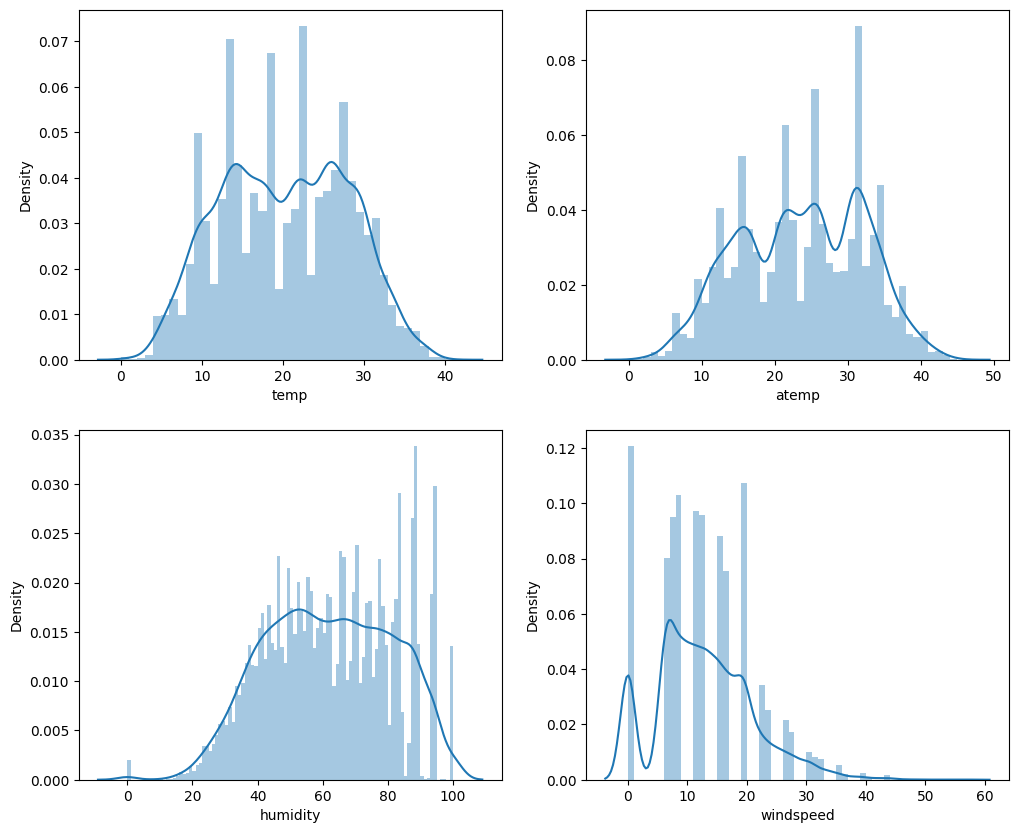

In [114]:
#그리고 남은 분포를 통해 표현하였을 때 좋은 컬럼들을 count와 비교해보자
# jd 하단 plot 코드와 비교
# fig = plt.figure(figsize=[12,10])
# ax1 = fig.add_subplot(2,2,1)
# ax1 = sns.barplot(x='season',y='count',data=train.groupby('season')['count'].mean().reset_index())

#온도와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.distplot(train.temp,bins=range(train.temp.min().astype('int'),train.temp.max().astype('int')+1))

#평균온도와 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.distplot(train.atemp,bins=range(train.atemp.min().astype('int'),train.atemp.max().astype('int')+1))

#습도와 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.distplot(train.humidity,bins=range(train.humidity.min().astype('int'),train.humidity.max().astype('int')+1))

#바람속도와 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.distplot(train.windspeed,bins=range(train.windspeed.min().astype('int'),train.windspeed.max().astype('int')+1))

In [122]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,Wednesday,22


In [121]:
print(train.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
year            int64
month           int64
day             int64
weekday        object
hour            int64
dtype: object


In [124]:
#각각의 컬럼들 간의 상관계수를 heatmap을 통해 시각화
#jd 면접 언급! 오류 : 사전에 datetime을 (년,월,일 등) split 했는데, 이를 또 사용함으로 문자열을 사용하게됨
# 숫자형 데이터만 선택필요 
numeric_columns = train.select_dtypes(include=[np.number])
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,Saturday,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,Saturday,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,Saturday,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,Saturday,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,Wednesday,22


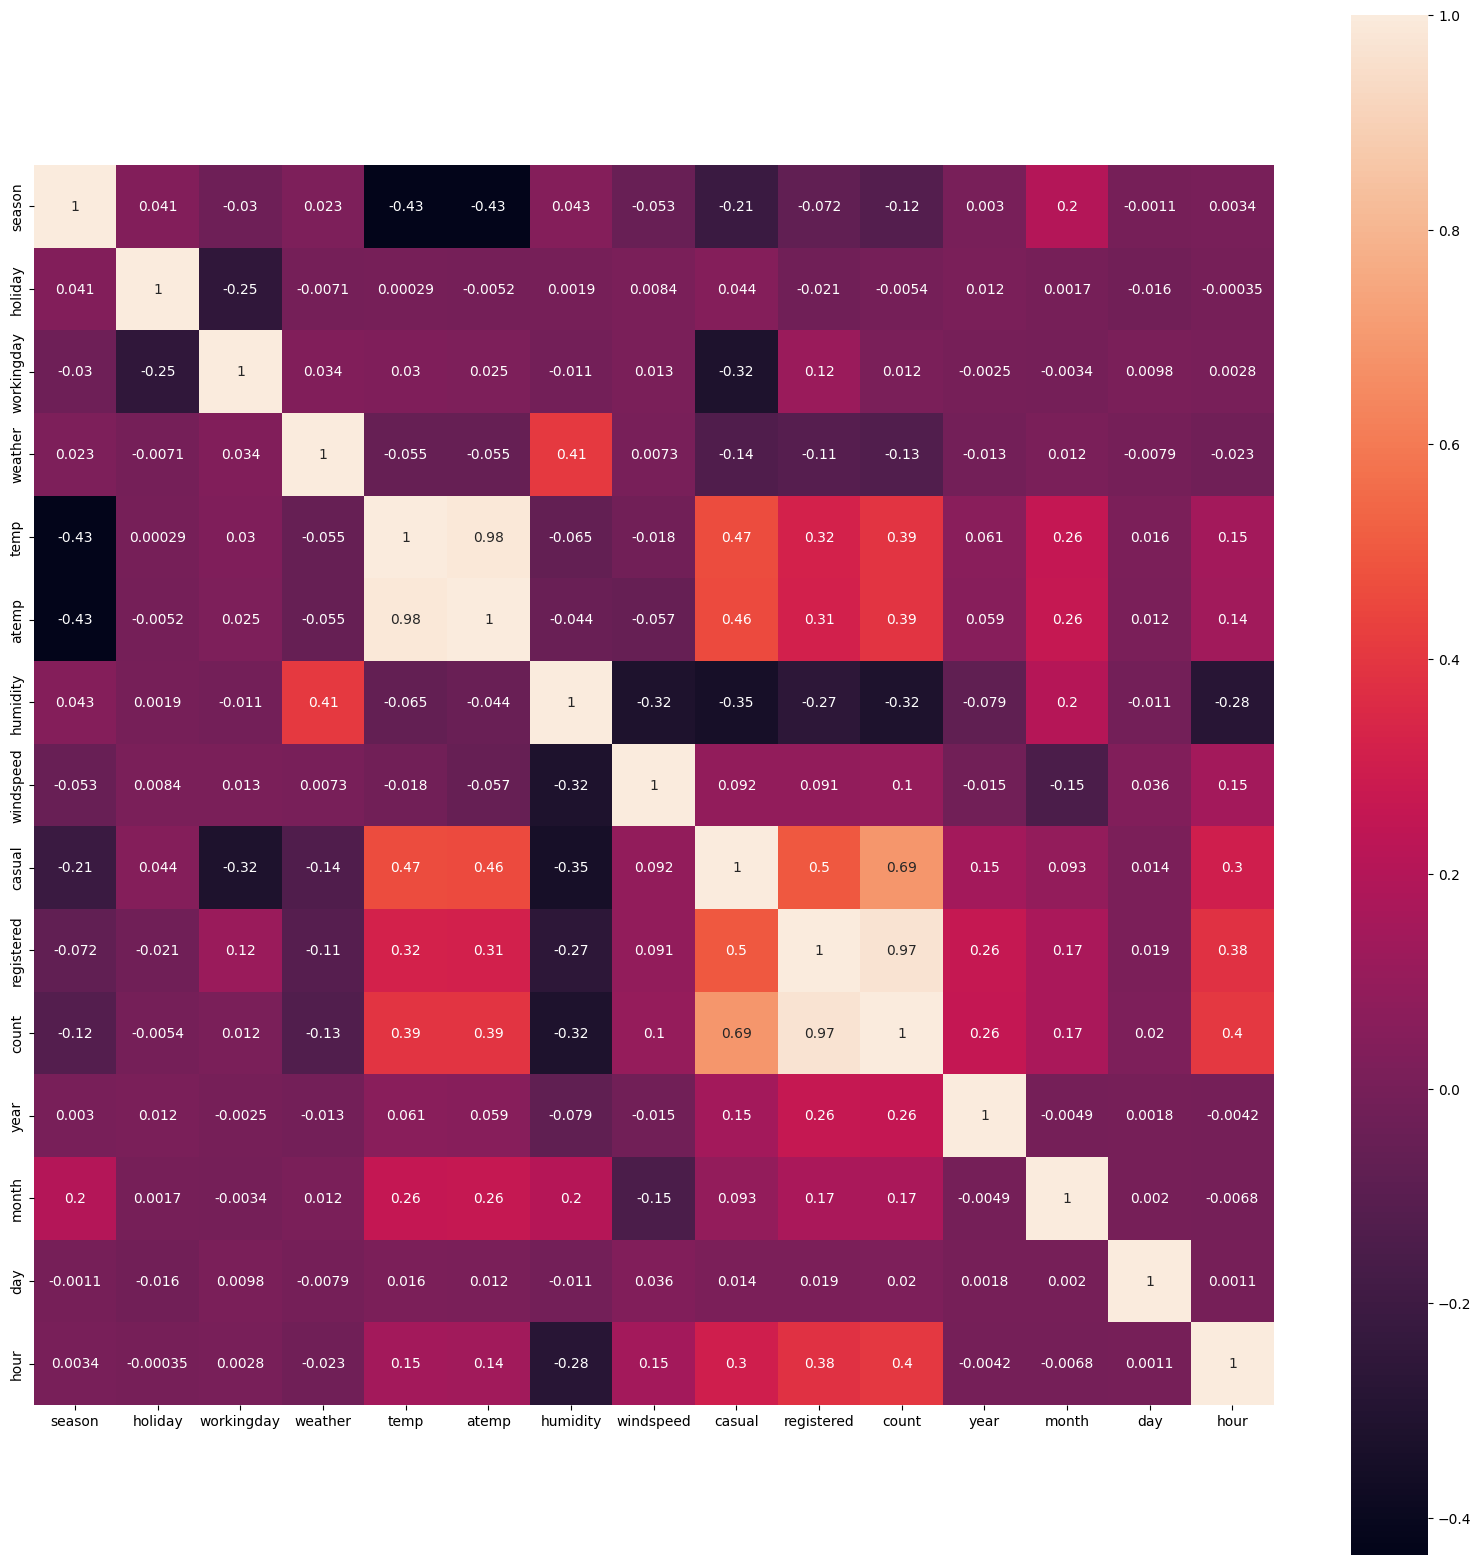

In [132]:
#원본
# fig = plt.figure(figsize=[20,20])
# ax = sns.heatmap(train.corr(),annot=True,square=True)

#수정
#상관계수 계산 및 시각화 again
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(numeric_columns.corr(), annot=True, square=True)
plt.show()

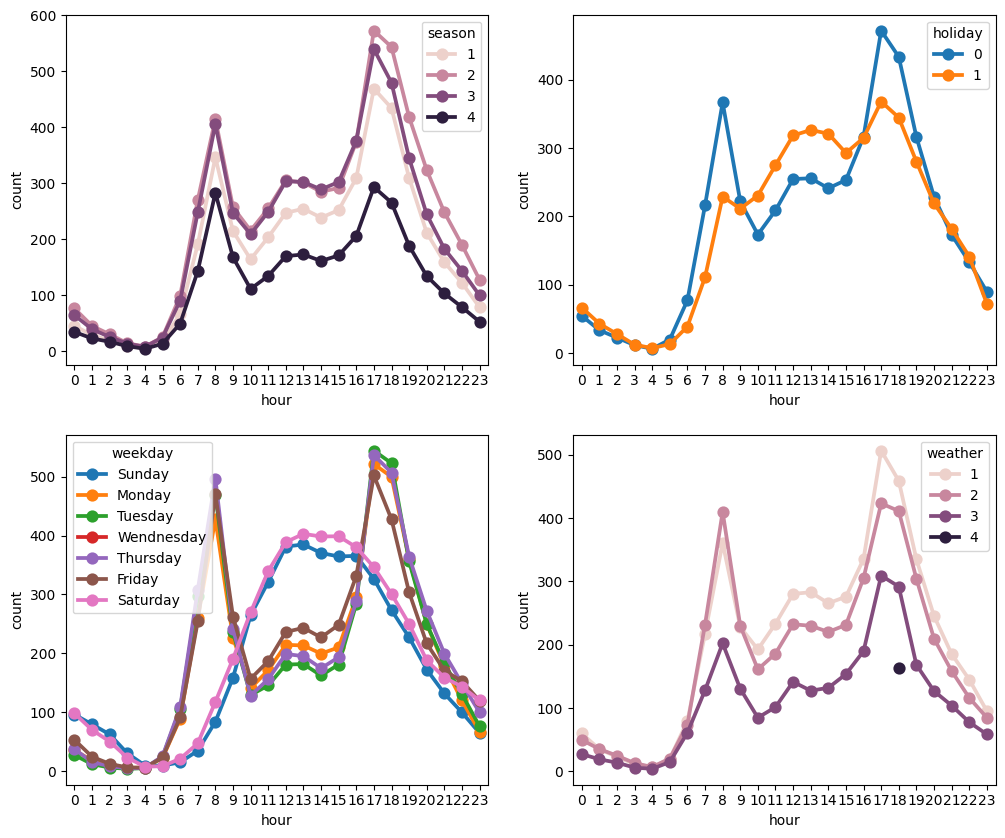

In [133]:
#heatmap 상관관계를 참조하여 이전의 시각화와는 달리 두 개의 서로다른 컬럼이 적용된 count를 시각화해보자
#jd 이전 plot과의 차이는, 이전: 시즌과 카운트만 봄 > 이후:한시즌 기준 시간대별로 더 자세히 들여다봄. 봄에는 이시간대가 / 여름에는 이 시간대가~ 수요 높군. 이렇게

#시간과 계절에 따른 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.pointplot(x='hour',y='count',hue='season',data=train.groupby(['season','hour'])['count'].mean().reset_index())
#1부터 봄,여름,가을,겨울

#시간과 휴일 여부에 따른 count
ax2 = fig.add_subplot(2,2,2)
ax2 = sns.pointplot(x='hour',y='count',hue='holiday',data=train.groupby(['holiday','hour'])['count'].mean().reset_index())

#시간과 휴일 여부에 따른 count
ax3 = fig.add_subplot(2,2,3)
ax3 = sns.pointplot(x='hour',y='count',hue='weekday',hue_order=['Sunday','Monday','Tuesday','Wendnesday','Thursday','Friday','Saturday'],data=train.groupby(['weekday','hour'])['count'].mean().reset_index())

#시간과 날씨에 따른 count
ax4 = fig.add_subplot(2,2,4)
ax4 = sns.pointplot(x='hour',y='count',hue='weather',data=train.groupby(['weather','hour'])['count'].mean().reset_index())

In [134]:
#마지막 시각화에 이상치가 있는 것같아서 확인

train[train.weather==4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,weekday,hour
5631,2012-01-09 18:00:00,4,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,Monday,18


In [136]:
print(train[train.weather==4])

                 datetime  season  holiday  workingday  weather  temp   atemp  \
5631  2012-01-09 18:00:00       4        0           1        4   8.2  11.365   

      humidity  windspeed  casual  registered  count  year  month  day  \
5631        86     6.0032       6         158    164  2012      1    9   

     weekday  hour  
5631  Monday    18  


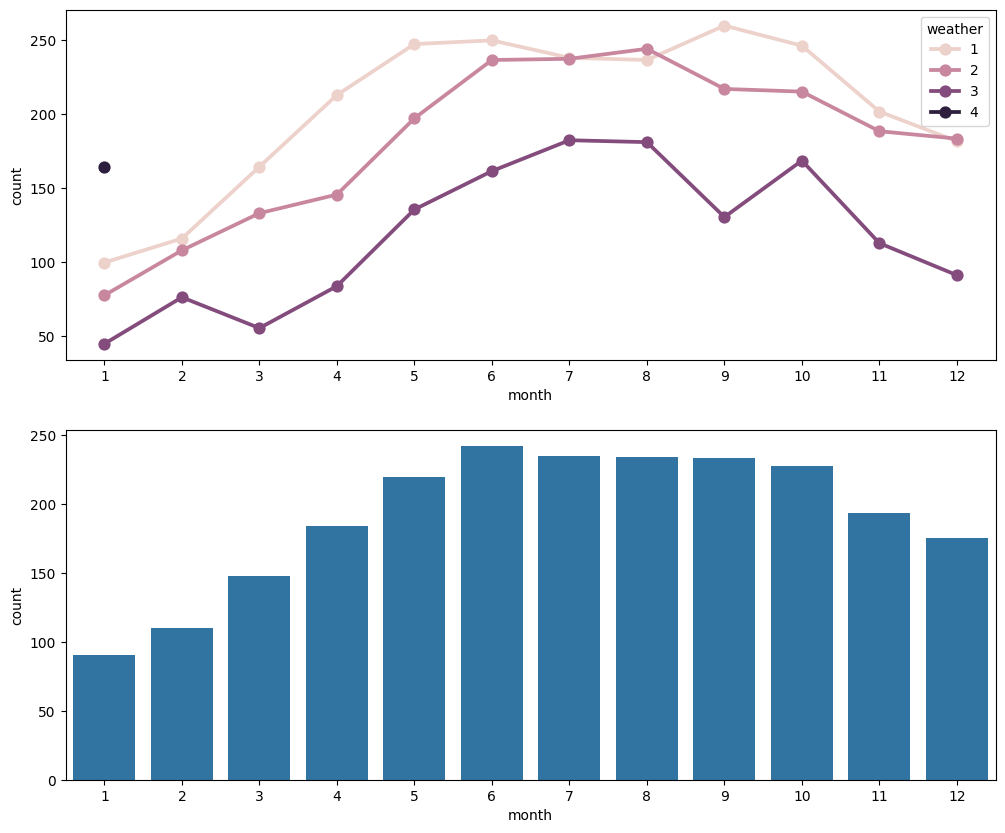

In [135]:
#달과 날씨에 따른 count 
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(2,1,1)
ax1 = sns.pointplot(x='month',y='count',hue='weather',data=train.groupby(['weather','month'])['count'].mean().reset_index())

#달별 count
ax2 = fig.add_subplot(2,1,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())

""" jd 달과 날씨를 연관지어 봄 - 아무리 좋은 봄 여름이라도 weather가 짓궃은 날들이 있을 것임. 하지만 전반적으로는 봄부터 가을이 수요가 높고, 
weather는 1,2,3이 높은 편이었음 """

In [137]:
"""
Windspeed 분포를 표현한 그래프에서 Windspeed가 0인 값들이 많았는데,
이는 실제로 0이었던지 or 값을 제대로 측정하지 못해서 0인지 두 개의 경우가 있다.
하지만 후자의 생각을 가지고 우리의 데이터를 활용하여 windspeed값을 부여해보자
"""

#머신러닝 모델에 훈련시킬 때는 문자열 값은 불가능하기 때문에 문자열을 카테고리화 하고 각각에 해당하는 값을 숫자로 변환해준다
train['weekday']= train.weekday.astype('category')

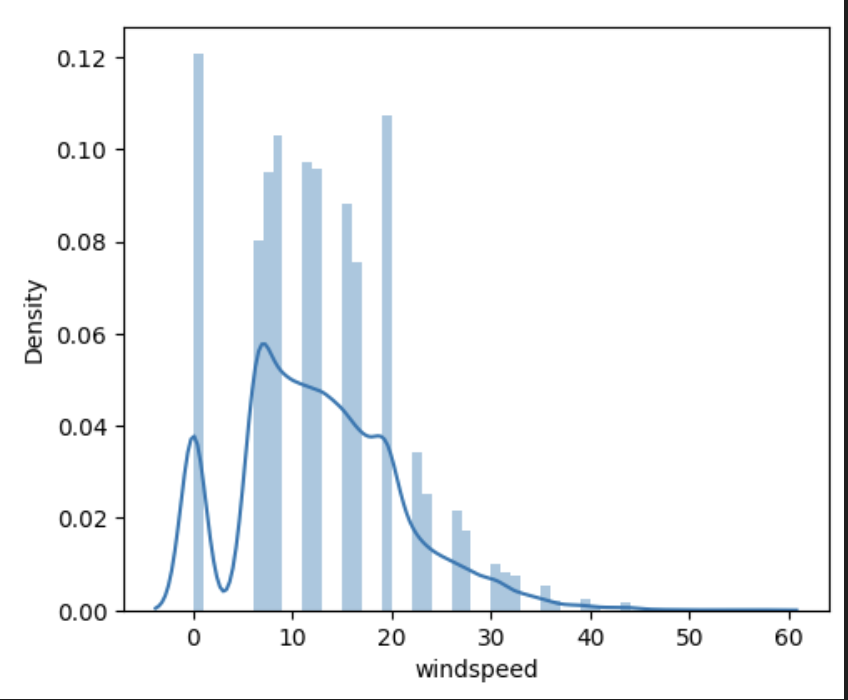

In [138]:
print(train['weekday'].cat.categories)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [140]:
#0:Sunday --> 6:Saturday
#원본
# train.weekday.cat.categories = ['5','1','6','0','4','2','3']

# jd 오류수정, 면접
# new 카테고리 목록 생성
new_categories = ['5', '1', '6', '0', '4', '2', '3']

# Categorical 변수를 새로 만듦
train['weekday'] = pd.Categorical(train['weekday'], categories=new_categories)

# 새로운 categories 확인
print(train['weekday'].cat.categories)

Index(['5', '1', '6', '0', '4', '2', '3'], dtype='object')


In [142]:
"""
RandomForest를 활용하여 Windspeed값을 부여해보자
하나의 데이터를 Windspeed가 0인 그리고 0이 아닌 데이터프레임으로 분리하고
학습시킬 0이 아닌 데이터 프레임에서는 Windspeed만 담긴 Series와 이외의 학습시킬 column들의 데이터프레임으로 분리한다
학습 시킨 후에 Windspeed가 0인 데이터 프레임에서 학습시킨 컬럼과 같게 추출하여 결과 값을 부여받은 후,
Windspeed가 0인 데이터프레임에 Windspeed값을 부여한다.
"""

"""jd 내가 개념만 알고 정확하게 몰랐던 점 <독립변수, 종속변수> / 면접
 불필요한 컬럼을 제거하는 코드에서 > 쓰여지는 컬럼들이 독립변수로 적용됨을 몰랐음
 수치형(연속형)과 범주형(카테고리형)을 정확히 몰랐음 ex: 기온은 수치형 독립변수이고, 날씨(맑음, 흐림)는 범주형 독립변수
 종속변수 = 예측하고자 하는 결과변수 <- 독립변수의 변화에 따라 값이 결정 됨 ex. 강수량 / 주택의 
 모델의 학습이란, 내가 준 독립변수와 종속변수간의 관계를 학습 > 주어진 독립변수에 대한 종속변수를 예측함 ex. 기온과 바람의 속도와 같은 독립변수를 사용하여 비가 올 확률을 예측
	•	회귀 문제: 독립변수가 연속형일 때, 예를 들어 주택 가격 예측에서 면적, 방의 수 등을 사용하여 가격을 예측
	•	분류 문제: 독립변수가 범주형일 때, 예를 들어 이메일이 스팸인지 아닌지를 예측

우리 모델에 적용
 독립변수: windspeed_Not0_df 는 제외한 컬럼을 빼면, 바람의 속도(종속변수)에 영향을 주는 다양한 요인의 컬럼을 포함(온도, 습도 등)
 종속변수: windspeed_Not0_series는 실제 바람의 속도 값으로, 이 값을 예측하는 것이 모델의 목표
 각 배열은 이러한 인풋일때 이러한 결과가 도출됨이 주어졌기에 > 관계를 학습함.
•   rf: RandomForestRegressor 모델을 초기화
•	rf.fit(...): windspeed_Not0_df를 독립 변수로, windspeed_Not0_series를 종속 변수로 사용하여 모델을 학습
•	rf.predict(...)는 학습된 모델에 새로운 데이터를 입력하여 해당 데이터의 종속변수(예: windspeed) 값을 예측하는 메소드
•	이 메소드는 입력된 데이터의 각 샘플에 대해 예측 값을 계산
"""

from sklearn.ensemble import RandomForestRegressor

#Windspeed가 0인 데이터프레임
windspeed_0 = train[train.windspeed == 0]
#Windspeed가 0이 아닌 데이터프레임
windspeed_Not0 = train[train.windspeed != 0]

#Windspeed가 0인 데이터 프레임에 투입을 원치 않는 컬럼을 배제
windspeed_0_df = windspeed_0.drop(['windspeed','casual','registered','count','datetime'],axis=1)

#Windspeed가 0이 아닌 데이터 프레임은 위와 동일한 데이터프레임을 형성하고 학습시킬 Windspeed Series를 그대로 둠
windspeed_Not0_df = windspeed_Not0.drop(['windspeed','casual','registered','count','datetime'],axis=1)
windspeed_Not0_series = windspeed_Not0['windspeed'] 

#모델에 0이 아닌 데이터프레임과 결과값을 학습
rf = RandomForestRegressor()
rf.fit(windspeed_Not0_df,windspeed_Not0_series)
#학습된 모델에 Windspeed가 0인 데이터프레임의 Windspeed를 도출
predicted_windspeed_0 = rf.predict(windspeed_0_df)
#도출된 값을 원래의 데이터프레임에 삽입
windspeed_0['windspeed'] = predicted_windspeed_0

In [143]:
#나눈 데이터 프레임을 원래의 형태로 복원
train = pd.concat([windspeed_0,windspeed_Not0],axis=0)

In [144]:
#시간별 정렬을 위해 string type의 datetime을 datetime으로 변환
train.datetime = pd.to_datetime(train.datetime,errors='coerce')

In [145]:
#합쳐진 데이터를 datetime순으로 정렬
train = train.sort_values(by=['datetime'])

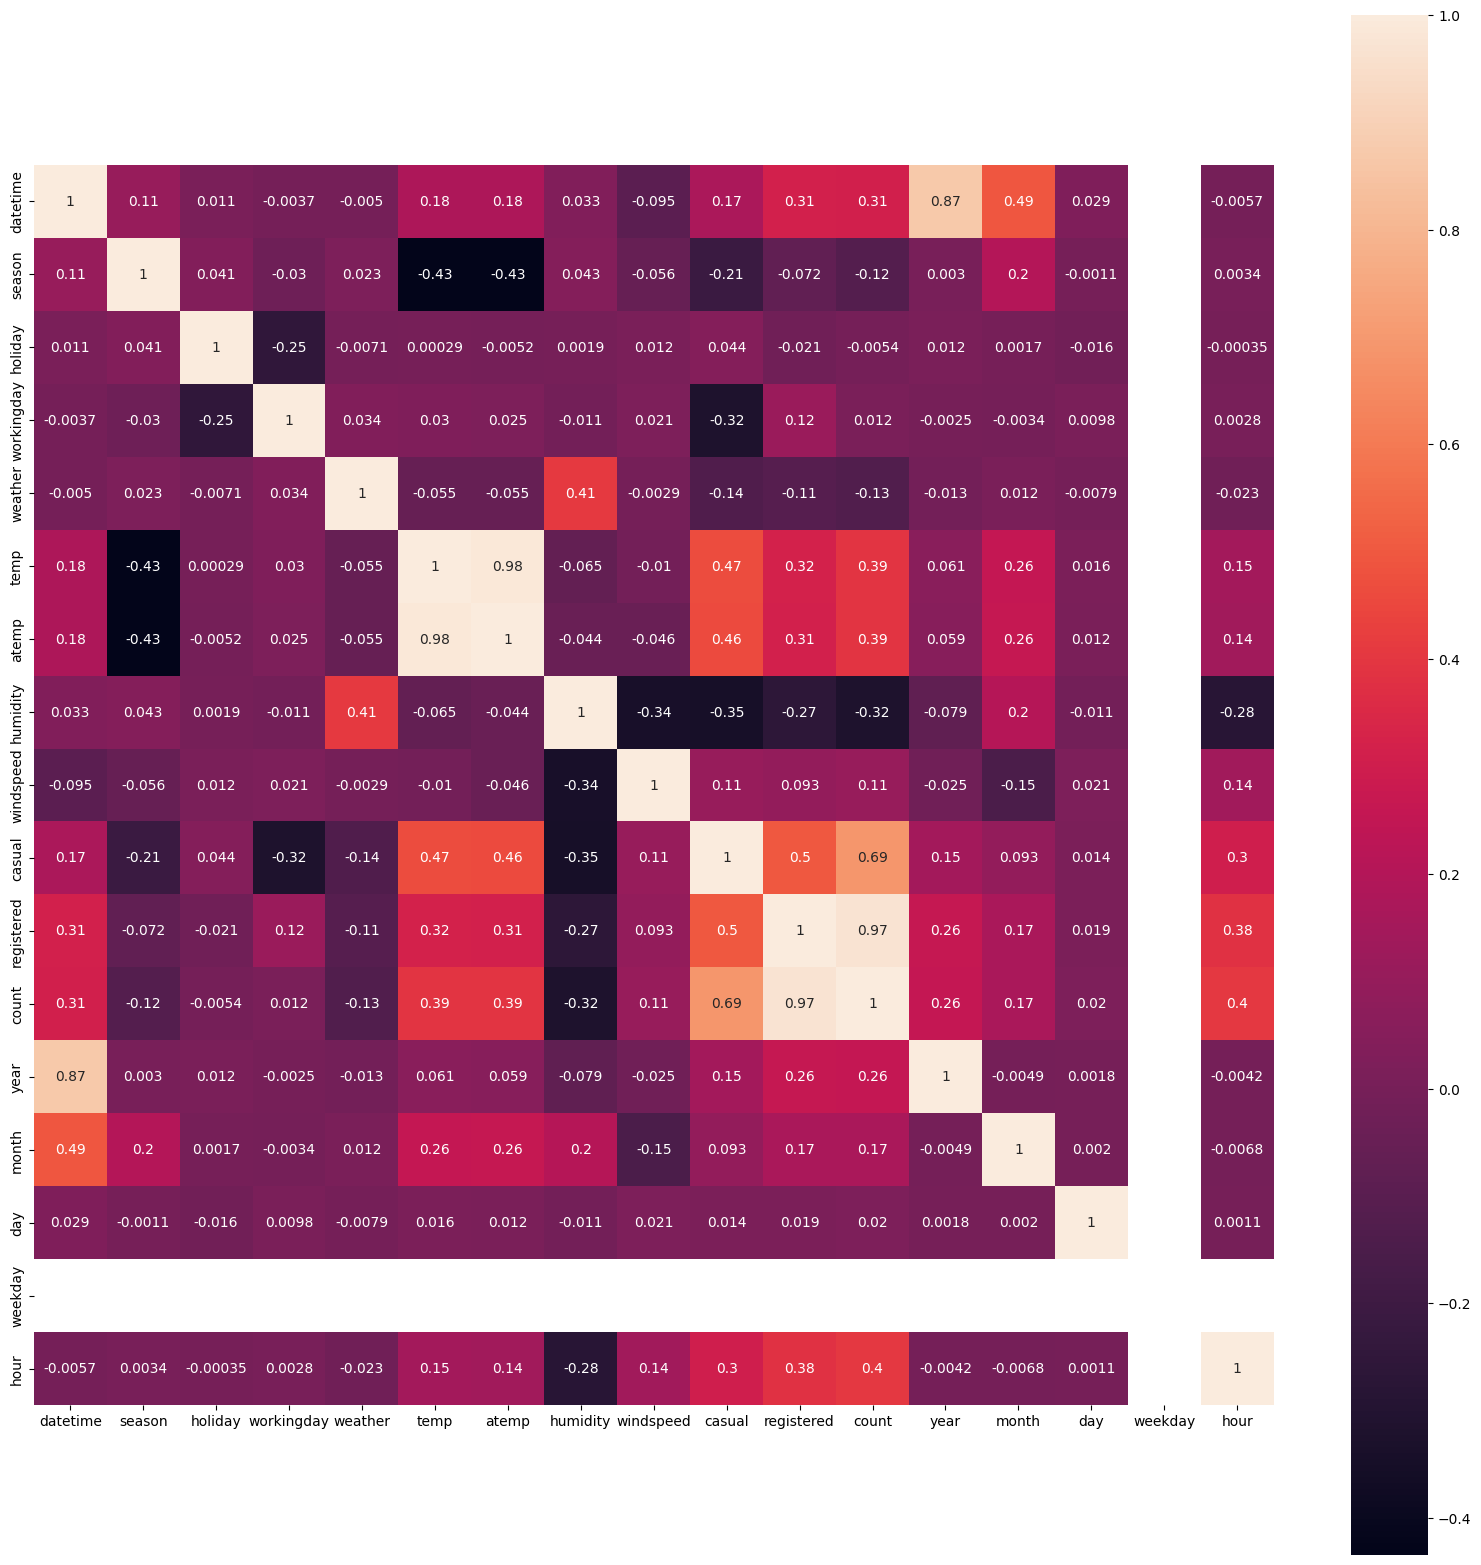

In [146]:
#windspeed를 수정한 후 다시 상관계수를 분석
#우리의 기대와는 달리 windspeed와 count의 상관관계는 0.1에서 0.11로 간소한 차이만 보임.
fig = plt.figure(figsize=[20,20])
ax = sns.heatmap(train.corr(),annot=True,square=True)

Min value of windspeed is 6.0032


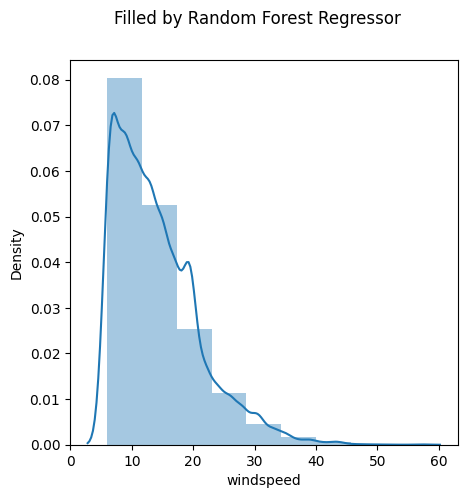

In [147]:
fig = plt.figure(figsize=[5,5])
sns.distplot(train['windspeed'],bins=np.linspace(train['windspeed'].min(),train['windspeed'].max(),10))
plt.suptitle("Filled by Random Forest Regressor")
print("Min value of windspeed is {}".format(train['windspeed'].min()))

# jd 이걸 보여주는 이유는, 0이라는 데이터에서 > rf모델을 돌려 새롭게 채워진 windspeed를 시각적으로 보기 위함인 듯 하다.

In [148]:
"""이제 모든 동일한 전처리 과정을 test셋과 한꺼번에 진행"""
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [149]:
combine = pd.concat([train,test],axis=0)

In [150]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 6492
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.7+ MB


In [151]:
combine['tempDate'] = combine.datetime.apply(lambda x:x.split())
combine['weekday'] = combine.tempDate.apply(lambda x: calendar.day_name[datetime.strptime(x[0],"%Y-%m-%d").weekday()])
combine['year'] = combine.tempDate.apply(lambda x: x[0].split('-')[0])
combine['month'] = combine.tempDate.apply(lambda x: x[0].split('-')[1])
combine['day'] = combine.tempDate.apply(lambda x: x[0].split('-')[2])
combine['hour'] = combine.tempDate.apply(lambda x: x[1].split(':')[0])

#면접, 질문
# 위 과정에서 test 데이터를 combine해서 전처리 하는게 궁금했었음 -> 해결 / but 질문은 하나 있어서 면접때 여쭙기

In [152]:
combine['year'] = pd.to_numeric(combine.year,errors='coerce')
combine['month'] = pd.to_numeric(combine.month,errors='coerce')
combine['day'] = pd.to_numeric(combine.day,errors='coerce')
combine['hour'] = pd.to_numeric(combine.hour,errors='coerce')

In [153]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 6492
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  tempDate    17379 non-null  object 
 13  weekday     17379 non-null  object 
 14  year        17379 non-null  int64  
 15  month       17379 non-null  int64  
 16  day         17379 non-null  int64  
 17  hour        17379 non-null  int64  
dtypes: float64(6), int64(9), object(3)
memory usage: 2.5+ MB


In [154]:
combine['season'] = combine.month.apply(badToRight)

In [155]:
combine.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,tempDate,weekday,year,month,day,hour
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,"[2011-01-01, 00:00:00]",Saturday,2011,1,1,0
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,"[2011-01-01, 01:00:00]",Saturday,2011,1,1,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,"[2011-01-01, 02:00:00]",Saturday,2011,1,1,2
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,"[2011-01-01, 03:00:00]",Saturday,2011,1,1,3
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,"[2011-01-01, 04:00:00]",Saturday,2011,1,1,4


In [156]:
combine.weekday = combine.weekday.astype('category')

In [161]:
# 원본
# combine.weekday.cat.categories = ['5','1','6','0','4','2','3']

# 수정후 (train data 처럼 전처리 시행)
print(combine['weekday'].cat.categories)
combine_categories = ['5','1','6','0','4','2','3']
combine['weekday'] = pd.Categorical(combine['weekday'],categories=combine_categories)
print(combine['weekday'].cat.categories)



Index(['5', '1', '6', '0', '4', '2', '3'], dtype='object')
Index(['5', '1', '6', '0', '4', '2', '3'], dtype='object')


In [162]:
dataWind0 = combine[combine['windspeed']==0]
dataWindNot0 = combine[combine['windspeed']!=0]

In [163]:
dataWind0.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'tempDate', 'weekday', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [164]:
dataWind0_df = dataWind0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)
#jd 독립변수 생성

dataWindNot0_df = dataWindNot0.drop(['windspeed','casual','registered','count','datetime','tempDate'],axis=1)
dataWindNot0_series = dataWindNot0['windspeed']
#jd 종속변수 생성

In [165]:
dataWindNot0_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,weekday,year,month,day,hour
5,4,0,0,2,9.84,12.880,75,NaN,2011,1,1,5
10,4,0,0,1,15.58,19.695,76,NaN,2011,1,1,10
11,4,0,0,1,14.76,16.665,81,NaN,2011,1,1,11
12,4,0,0,1,17.22,21.210,77,NaN,2011,1,1,12
13,4,0,0,2,18.86,22.725,72,NaN,2011,1,1,13


In [166]:
dataWind0_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,weekday,year,month,day,hour
0,4,0,0,1,9.84,14.395,81,NaN,2011,1,1,0
1,4,0,0,1,9.02,13.635,80,NaN,2011,1,1,1
2,4,0,0,1,9.02,13.635,80,NaN,2011,1,1,2
3,4,0,0,1,9.84,14.395,75,NaN,2011,1,1,3
4,4,0,0,1,9.84,14.395,75,NaN,2011,1,1,4


In [167]:
rf2 = RandomForestRegressor()
rf2.fit(dataWindNot0_df,dataWindNot0_series)
#독립변수, 종속변수
predicted = rf2.predict(dataWind0_df)
print(predicted)

#사실 위 과정은 test데이터의 windspeed 중 0인 값들을 train data처럼 0이 아니게끔 만들기 위한 과정일 뿐이다.

[ 7.682354  7.122502  7.052554 ...  8.331852 26.850183  8.850834]


In [168]:
dataWind0['windspeed'] = predicted
#combine에서 가져온 windspeed임을 잊지말 것

In [169]:
combine = pd.concat([dataWind0,dataWindNot0],axis=0)
#jd axis 0이 세로다

In [170]:
#우리가 가진 column들 중 값들이 일정하고 정해져있다면 category로 변경해주고
#필요하지 않은 column들은 이제 버린다.
"""면접, 질문, 공부
값들이 일정하고 정해져 있다는 의미는?
결국 예측 모델을 만드는 것이 우리의 목적, 즉 count나 registered 같은 것들은 우리가 예측해야할 변수이기에 이 또한 없애는 거다.
 ==> 2차 공부
 아, 이때 없애는건 종속변수라 없애는게 아니라! -> 카테고리화 시키면 좀더 효율적으로 계산되기 때문인거다! drop된 column은 추후에 결국 train때 쓰임.
"""

categorizational_columns = ['holiday','humidity','season','weather','workingday','year','month','day','hour']
drop_columns = ['datetime','casual','registered','count','tempDate']

In [171]:
#categorical하게 변환
for col in categorizational_columns:
    combine[col] = combine[col].astype('category')

In [172]:
#합쳐진 combine데이터 셋에서 count의 유무로 훈련과 테스트셋을 분리하고 각각을 datetime으로 정렬
train = combine[pd.notnull(combine['count'])].sort_values(by='datetime')
test = combine[~pd.notnull(combine['count'])].sort_values(by='datetime')

#데이터 훈련시 집어 넣게 될 각각의 결과 값들
datetimecol = test['datetime']
yLabels = train['count'] #count
yLabelsRegistered = train['registered'] #등록된 사용자
yLabelsCasual = train['casual'] #임시 사용자

In [173]:
#필요 없는 column들을 버린 후의 훈련과 테스트 셋
train = train.drop(drop_columns,axis=1)
test = test.drop(drop_columns,axis=1)

In [174]:
"""
해당 문제에서는 RMSLE방식을 이용하여 제대로 예측이 되었는지 평가하게 됨.
RMSLE는 아래 링크를 참조하여 이용.
https://programmers.co.kr/learn/courses/21/lessons/943#

RMSLE
과대평가 된 항목보다는 과소평가 된 항목에 페널티를 주는방식
오차를 제곱하여 형균한 값의 제곱근으로 값이 작아질 수록 정밀도가 높음
0에 가까운 값이 나올 수록 정밀도가 높다
"""

# y is predict value y_ is actual value
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y), 
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

#지수함수 exponential
#위 과정은 직접 RMSLE(Root Mean Squared Logarithmic Error)를 만들고 있는 것
#아 real data와, predict data를 서로 비교하고, 모델의 예측 성능을 평가할때 사용하는 것
"""RMSLE는 모델의 예측 성능을 평가할 때 사용하는 지표로, 실제 값과 예측 값 간의 차이를 로그 스케일에서 계산하여 오차를 측정합니다.
"""


'RMSLE는 모델의 예측 성능을 평가할 때 사용하는 지표로, 실제 값과 예측 값 간의 차이를 로그 스케일에서 계산하여 오차를 측정합니다.\n'

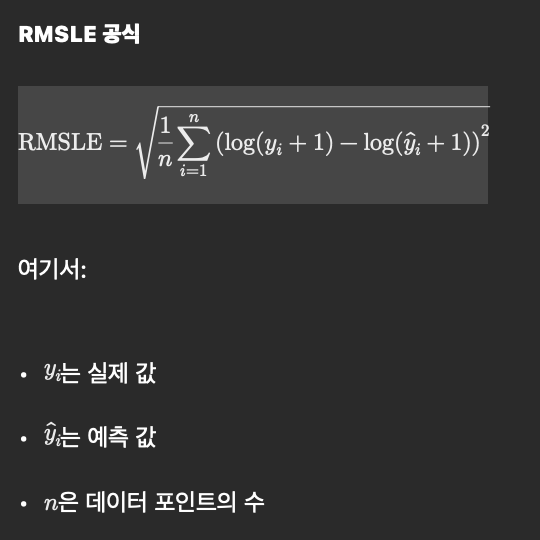

In [53]:
#선형 회귀 모델
#선형 회귀모델은 건드릴 만한 내부 attr들이 없음
from sklearn.linear_model import LinearRegression,Ridge,Lasso


lr = LinearRegression()

"""
아래의 커널을 참조하여 yLabels를 로그화 하려는데 왜 np.log가 아닌 np.log1p를 활용하는가??
np.log1p는 np.log(1+x)와 동일. 이유는 만약 어떤 x값이 0인데 이를 log하게되면, (-)무한대로 수렴하기 때문에 np.log1p를 활용함. 
참조: https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8 
"""
yLabelslog = np.log1p(yLabels)


#선형 모델에 우리의 데이터를 학습
lr.fit(train,yLabelslog)
#jd 독립변수들의 집합=train / 그에 대한 log스케일로 변한 종속변수 yLabelslog

#결과 값 도출
preds = lr.predict(train)

#rmsle함수의 element에 np.exp()지수 함수를 취하는 이유는 우리의 preds값에 얻어진 것은 한번 log를 한 값이기 때문에 원래 모델에는 log를 하지 않은 원래의 값을 넣기 위함임.
print('RMSLE Value For Linear Regression: {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

#jd 위과정은 계속 train data로 정답(yLabelslgo)을 사용하여, 학습시키고 > 이를 다시 정답과 비교해보는 과정을 거치고 있는거다.

RMSLE Value For Linear Regression: 0.9773733423199417


10886


10739

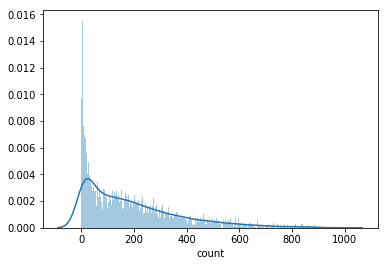

In [54]:
"""
데이터 훈련시 Log값을 취하는 이유??
우리가 결과 값으로 투입하는 Count값이 최저 값과 최고 값의 낙폭이 너무 커서
만약 log를 취하지 않고 해보면 print하는 결과 값이 inf(infinity)로 뜨게 됨
"""

#count값의 분포
sns.distplot(yLabels,bins=range(yLabels.min().astype('int'),yLabels.max().astype('int')))

#기존 훈련 데이터셋의 count의 개수
print(yLabels.count()) #10886

""" 
3 sigma를 활용한 이상치 확인
참조 : https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99
"""
#3시그마를 적용한 이상치를 배제한 훈련 데이터셋의 count의 개수
yLabels[np.logical_and(yLabels.mean()-3*yLabels.std() <= yLabels,yLabels.mean()+3*yLabels.std() >= yLabels)].count() #10739
#이상치들이 존재할 때는 log를 활용하여 값을 도출

In [55]:
"""
GridSearchCV를 활용하면 우리가 이용하게 될 각각의 모델마다 변경해야 하는 파라미터 튜닝시 어떤 파라미터가 최적의 값을 내는지 등을 알 수 있음.

GridSearchCV 참조:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://datascienceschool.net/view-notebook/ff4b5d491cc34f94aea04baca86fbef8/
"""
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#Ridge모델은 L2제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
ridge = Ridge()

#우리가 튜닝하고자하는 Ridge의 파라미터 중 특정 파라미터에 배열 값으로 넘겨주게 되면 테스트 후 어떤 파라미터가 최적의 값인지 알려줌 
ridge_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
rmsle_scorer = metrics.make_scorer(rmsle,greater_is_better=False)
grid_ridge = GridSearchCV(ridge,ridge_params,scoring=rmsle_scorer,cv=5)

grid_ridge.fit(train,yLabelslog)
preds = grid_ridge.predict(train)
print(grid_ridge.best_params_)
print('RMSLE Value for Ridge Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

{'alpha': 0.001, 'max_iter': 3000}
RMSLE Value for Ridge Regression 0.9773733420734945


In [56]:
#결과에 대해 GridSearchCV의 변수인 grid_ridge변수에 cv_result_를 통해 alpha값의 변화에 따라 평균값의 변화를 파악 가능
df = pd.DataFrame(grid_ridge.cv_results_)

In [57]:
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020963,0.005511,0.014358,0.000135,0.001,3000,"{'alpha': 0.001, 'max_iter': 3000}",-1.001850,-0.904087,-1.043957,-1.005282,-0.979912,-0.987019,0.046309,1,-0.974496,-0.995237,-0.963271,-0.970908,-0.977782,-0.976339,0.010610
1,0.020902,0.005680,0.014189,0.000051,0.01,3000,"{'alpha': 0.01, 'max_iter': 3000}",-1.001850,-0.904087,-1.043957,-1.005282,-0.979912,-0.987019,0.046309,2,-0.974496,-0.995237,-0.963271,-0.970908,-0.977782,-0.976339,0.010610
2,0.018440,0.000659,0.014162,0.000067,0.1,3000,"{'alpha': 0.1, 'max_iter': 3000}",-1.001851,-0.904087,-1.043959,-1.005281,-0.979912,-0.987019,0.046310,3,-0.974496,-0.995237,-0.963271,-0.970908,-0.977782,-0.976339,0.010610
3,0.018159,0.000182,0.014263,0.000086,1,3000,"{'alpha': 1, 'max_iter': 3000}",-1.001865,-0.904086,-1.043977,-1.005276,-0.979915,-0.987025,0.046315,4,-0.974496,-0.995237,-0.963270,-0.970908,-0.977782,-0.976339,0.010610
4,0.018201,0.000075,0.014136,0.000079,10,3000,"{'alpha': 10, 'max_iter': 3000}",-1.002000,-0.904079,-1.044159,-1.005230,-0.979944,-0.987084,0.046367,5,-0.974494,-0.995236,-0.963269,-0.970906,-0.977780,-0.976337,0.010611


In [58]:
#Ridge모델은 L1제약을 가지는 선형회귀모델에서 개선된 모델이며 해당 모델에서 유의 깊게 튜닝해야하는 파라미터는 alpha값이다.
lasso = Lasso()

lasso_params = {'max_iter':[3000],'alpha':[0.001,0.01,0.1,1,10,100,1000]}
grid_lasso = GridSearchCV(lasso,lasso_params,scoring=rmsle_scorer,cv=5)
grid_lasso.fit(train,yLabelslog)
preds = grid_lasso.predict(train)
print('RMSLE Value for Lasso Regression {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for Lasso Regression 0.9773840761058284


In [59]:
rf = RandomForestRegressor()

rf_params = {'n_estimators':[1,10,100]}
grid_rf = GridSearchCV(rf,rf_params,scoring=rmsle_scorer,cv=5)
grid_rf.fit(train,yLabelslog)
preds = grid_rf.predict(train)
print('RMSLE Value for RandomForest {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for RandomForest 0.10249530876867895


In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params={'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
grid_gb=GridSearchCV(gb,gb_params,scoring=rmsle_scorer,cv=5)
grid_gb.fit(train,yLabelslog)
preds = grid_gb.predict(train)
print('RMSLE Value for GradientBoosting {}'.format(rmsle(np.exp(yLabelslog),np.exp(preds),False)))

RMSLE Value for GradientBoosting 0.20675141336221733


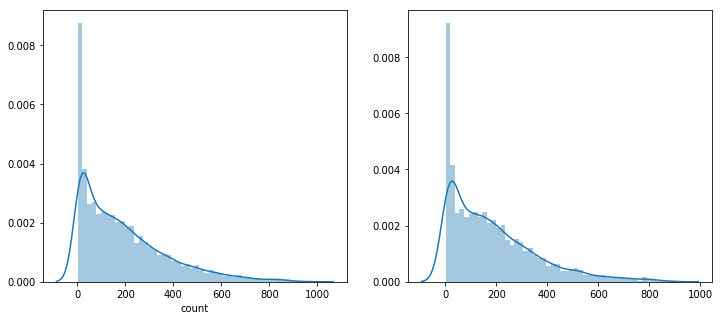

In [61]:
predsTest = grid_gb.predict(test)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(yLabels,ax=ax1,bins=50)
sns.distplot(np.exp(predsTest),ax=ax2,bins=50)

In [62]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)